<a href="https://colab.research.google.com/github/hikmaharani/ImplementasiLinearRegression/blob/main/PrediksiHouseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nama: Hikmah Maharani
# Nim: 09011282328058
# Kelas: SK3A

# Import Library


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Eksplorasi Data

melihat 5 baris pertama data

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1JF_KShPnv_8LEnJXJU5ktnv1Iu1kAeFz', usecols=['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Garage_Size', 'House_Price'])
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Garage_Size,House_Price
0,1360,2,1,1981,0,2.623829e+05
1,4272,3,3,2016,1,9.852609e+05
2,3592,1,2,2016,0,7.779774e+05
3,966,1,2,1977,1,2.296989e+05
4,4926,2,1,1993,0,1.041741e+06


memilih subset 100 baris pertama

In [ ]:
df = df.iloc[:100]

menunjukkan jumlah baris dan kolom

In [ ]:
df.shape

(100, 6)

meringkas statistik deskriptif data, seperti rata-rata, standar deviasi, nilai minimum,
 maksimum dan persentil

In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Garage_Size,House_Price
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,2669.940000,2.880000,2.000000,1988.070000,0.990000,5.905710e+05
std,1276.786321,1.423327,0.828775,19.603265,0.784895,2.592083e+05
min,534.000000,1.000000,1.000000,1950.000000,0.000000,1.476016e+05
25%,1519.750000,2.000000,1.000000,1973.000000,0.000000,3.748328e+05
50%,2820.500000,3.000000,2.000000,1987.500000,1.000000,5.957291e+05
75%,3616.000000,4.000000,3.000000,2005.000000,2.000000,7.803381e+05
max,4993.000000,5.000000,3.000000,2022.000000,2.000000,1.107045e+06


memeriksa nilai hilang

In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Garage_Size,0
House_Price,0


menampilkan nama kolom dan tipe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square_Footage  100 non-null    int64  
 1   Num_Bedrooms    100 non-null    int64  
 2   Num_Bathrooms   100 non-null    int64  
 3   Year_Built      100 non-null    int64  
 4   Garage_Size     100 non-null    int64  
 5   House_Price     100 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 4.8 KB


# EXPLORATORY DATA ANALYSIS

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Garage_Size,House_Price
0,1360,2,1,1981,0,2.623829e+05
1,4272,3,3,2016,1,9.852609e+05
2,3592,1,2,2016,0,7.779774e+05
3,966,1,2,1977,1,2.296989e+05
4,4926,2,1,1993,0,1.041741e+06


grafik  distribusi variabel Square Footage

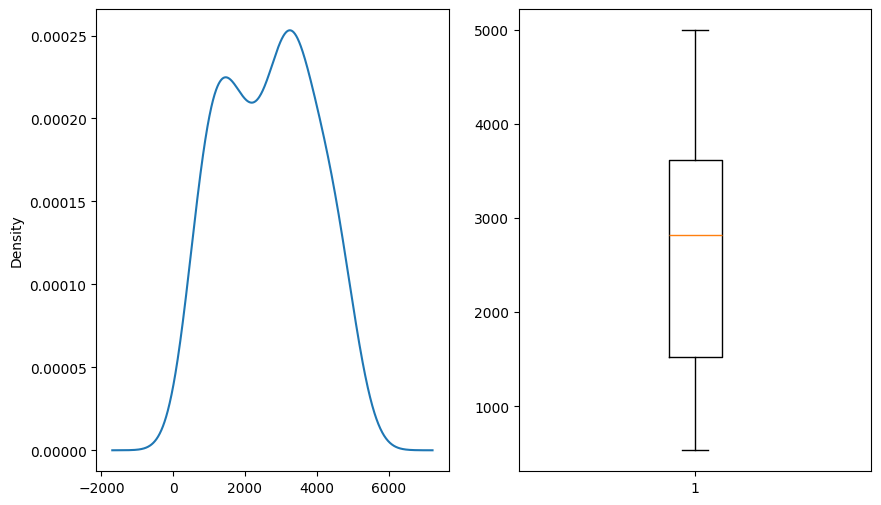

In [ ]:
f = plt.figure(figsize=(10,6))

f.add_subplot(1,2,1)
df['Square_Footage'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Square_Footage'])
plt.show()

grafik distribusi variabel Number of Bedrooms

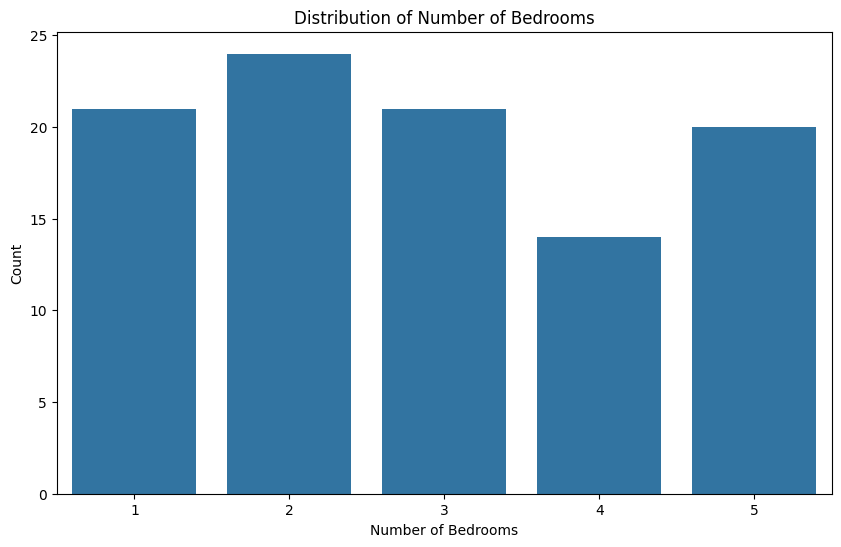

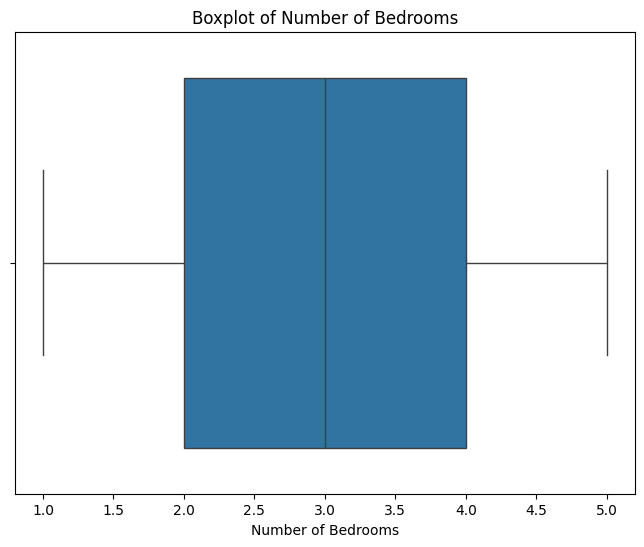

In [ ]:
f = plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Num_Bedrooms', data=df)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Num_Bedrooms'])
plt.title('Boxplot of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')

plt.show()

grafik distribusi variabel Number of Bathrooms

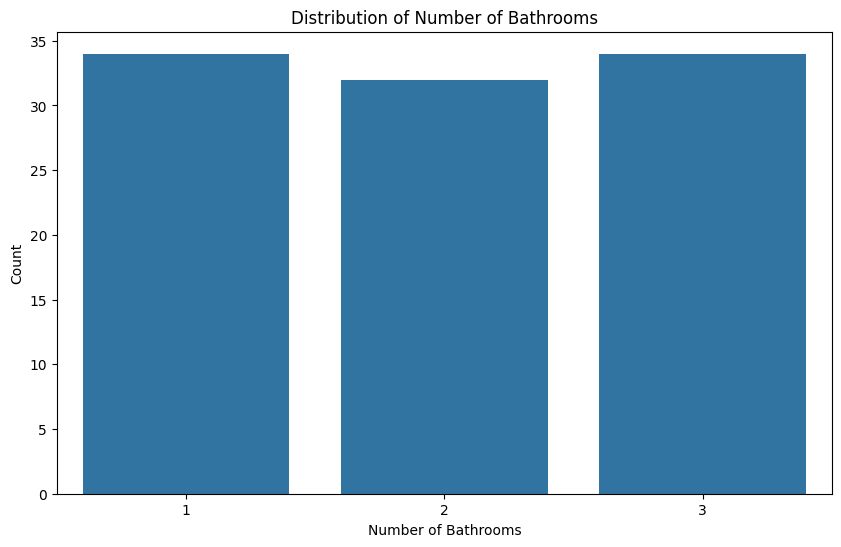

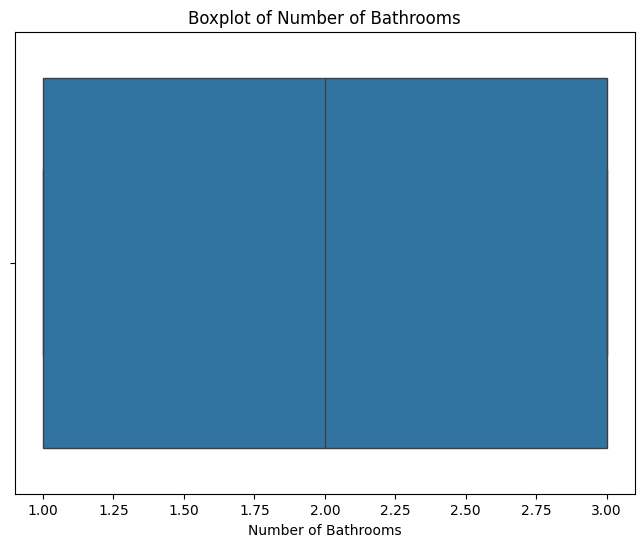

In [ ]:
f = plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Num_Bathrooms', data=df)
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Num_Bathrooms'])
plt.title('Boxplot of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.show()

grafik distribusi variabel Year Built

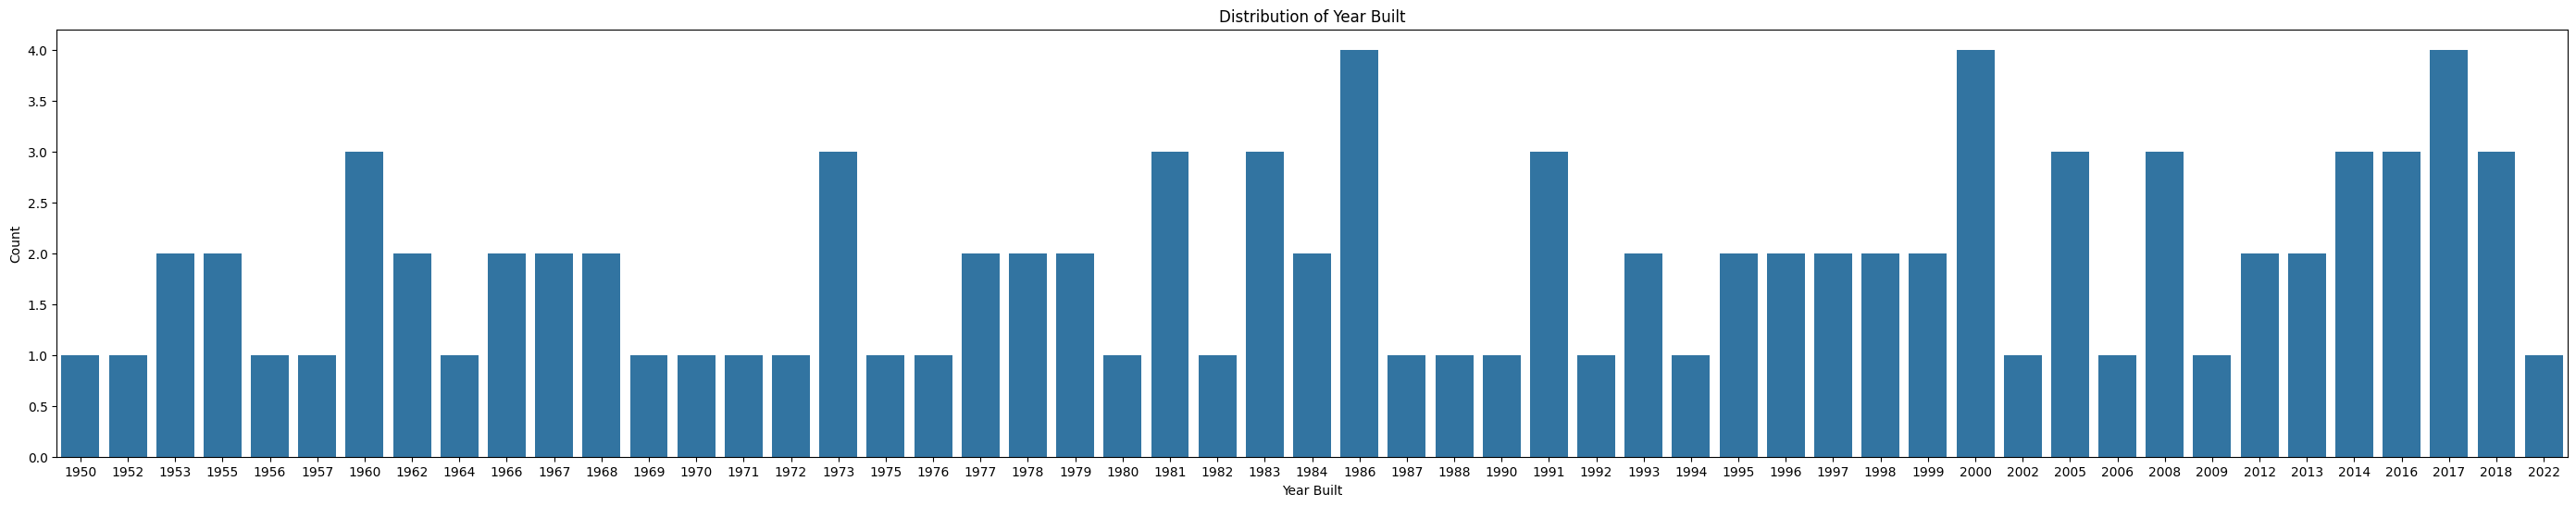

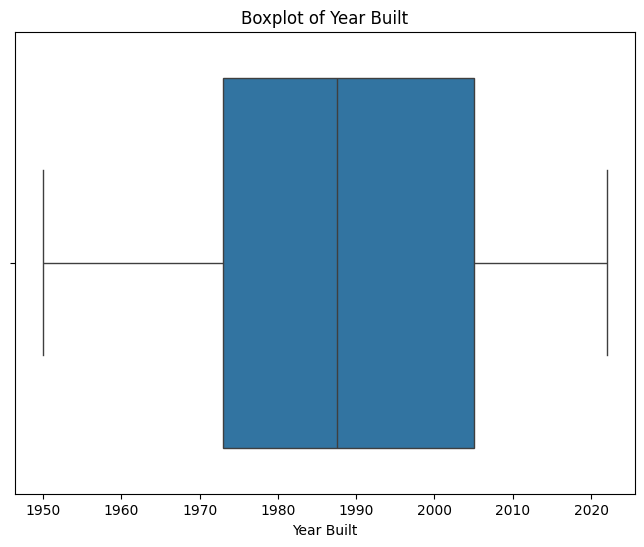

In [ ]:
plt.figure(figsize=(35, 6))
ax = sns.countplot(x='Year_Built', data=df)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Count')


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Year_Built'])
plt.title('Boxplot of Year Built')
plt.xlabel('Year Built')
plt.show()

grafik distribusi variabel Garage Size

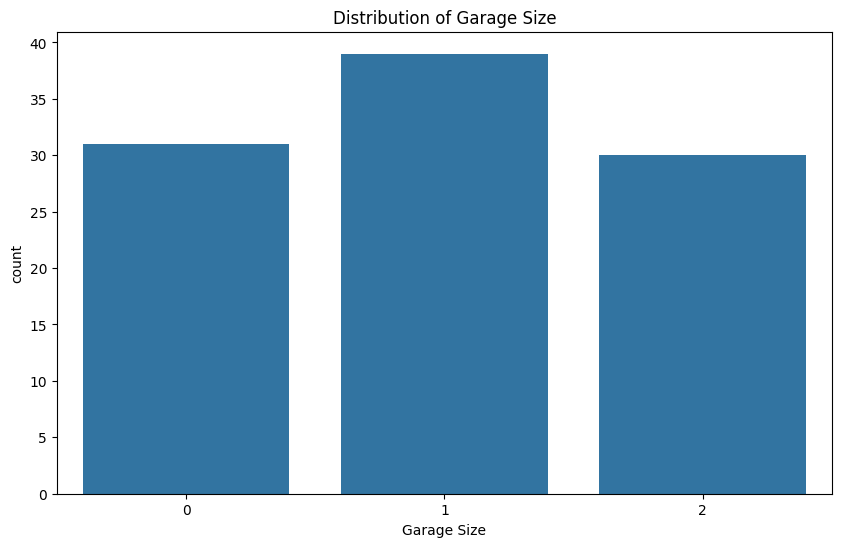

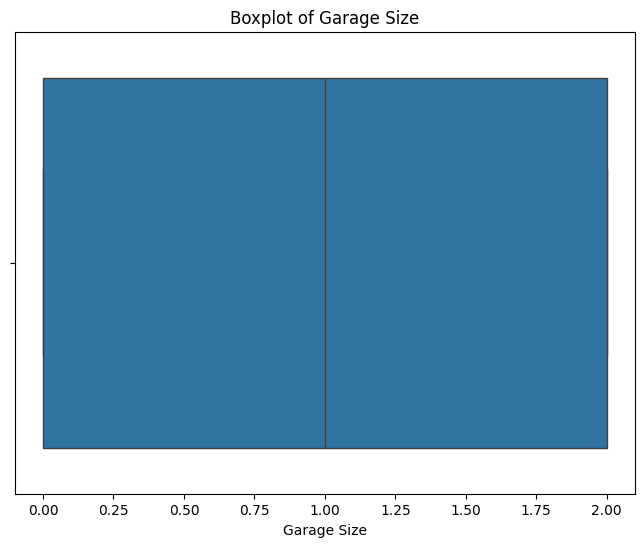

In [ ]:
f = plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Garage_Size', data=df)
plt.title('Distribution of Garage Size')
plt.xlabel('Garage Size')
plt.ylabel('count')


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Garage_Size'])
plt.title('Boxplot of Garage Size')
plt.xlabel('Garage Size')
plt.show()

pairplot hubungan antara variabel independen dan variabel dependen

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

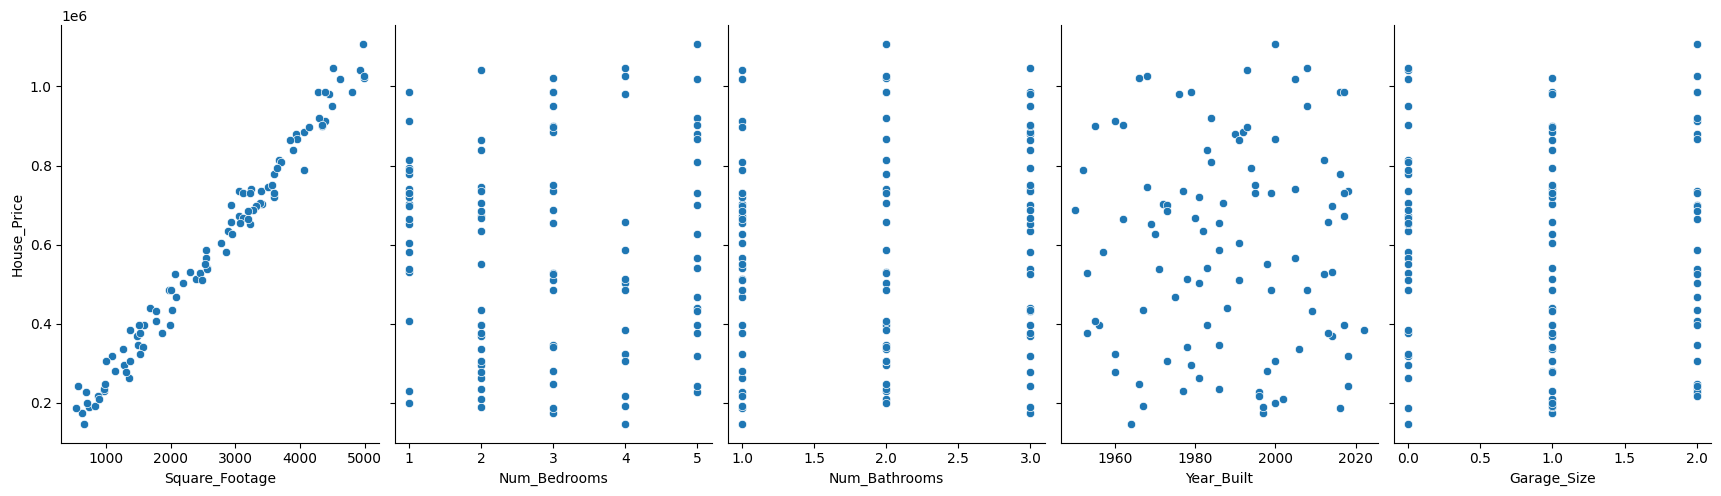

In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df, x_vars=['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Garage_Size'],
             y_vars=['House_Price'], size=5, aspect=0.7)
plt.show()

menghitung dan menampilkan matriks korelasi

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').format("{:.2f}")

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Garage_Size,House_Price
Square_Footage,1.00,-0.06,0.07,-0.08,-0.04,0.99
Num_Bedrooms,-0.06,1.00,-0.01,0.02,0.04,-0.01
Num_Bathrooms,0.07,-0.01,1.00,0.07,0.05,0.11
Year_Built,-0.08,0.02,0.07,1.00,-0.00,0.01
Garage_Size,-0.04,0.04,0.05,-0.00,1.00,-0.02
House_Price,0.99,-0.01,0.11,0.01,-0.02,1.00


# Pembagian Dataset

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Garage_Size,House_Price
0,1360,2,1,1981,0,2.623829e+05
1,4272,3,3,2016,1,9.852609e+05
2,3592,1,2,2016,0,7.779774e+05
3,966,1,2,1977,1,2.296989e+05
4,4926,2,1,1993,0,1.041741e+06


pemilihan fitur dan target

In [ ]:
x = df.drop('House_Price', axis=1)
y = df['House_Price']

pembagian dataset menjadi data train dan data tes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

memeriksa ukuran data

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 5)
(80,)
(20, 5)
(20,)


# Modelling

pembuatan model

In [ ]:
lin_reg = LinearRegression()

pelatihan model

In [ ]:
lin_reg.fit(x_train, y_train)

LinearRegression()

evaluasi model

In [ ]:
lin_reg.score(x_test, y_test)

0.9893854017107586

prediksi dan evaluasi dengan MSE, RMSE, R-Squared (R2)

In [ ]:
y_pred = lin_reg.predict(x_test)

mse =mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 =r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 648585601.1521103
Root Mean Squared Error: 25467.343818154855
R-squared: 0.9893854017107586


plot perbandingan nilai prediksi dan nilai aktual

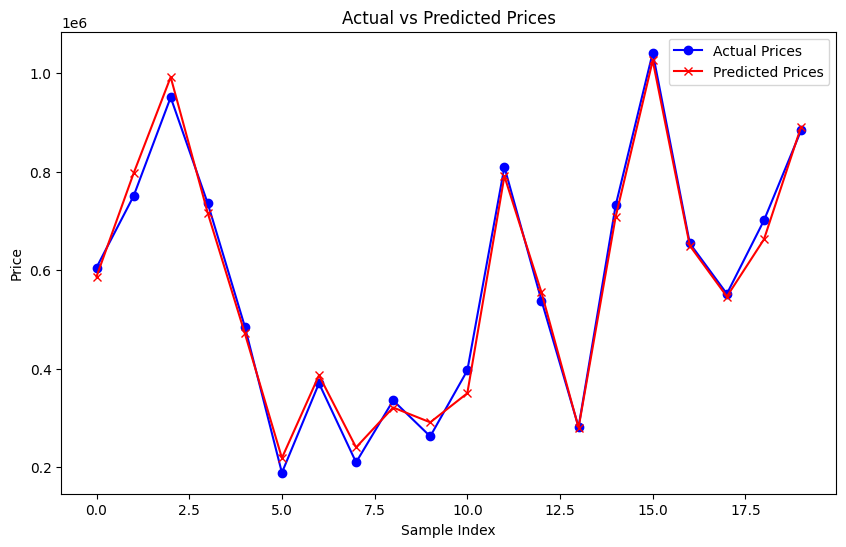

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue", marker="o")
plt.plot(y_pred, label="Predicted Prices", color="red", marker="x")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

######Memprediksi harga rumah dengan:
######Square Footage: 4926
######Number of Bedrooms: 4
######Number of Bathrooms: 2
######Year Built: 2006
######Garage Size: 2

In [ ]:
lin_reg.predict([[4926,4,2,2006,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1081355.17883548])